# Example Flow to Modeling

## Import modules

In [2]:
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from PipelineChallenge import split_data_stratified, standard_data, evaluate_model, plot_confusion_matrix, plot_roc_auc

In [4]:
data = pd.read_csv('data/smarket.csv')

## Prepare data

In [5]:
data['Direction'] = np.where(data['Direction'] == 'Up', 1, 0)

In [6]:
output_name = 'Direction'
test_size = 0.2
class_names = ['Up', 'Down']

### Making the train and test sets

In [20]:
strat_train_set, strat_test_set, X_train, y_train, X_test, y_test = split_data_stratified(data=data, output_name=output_name, test_size=test_size)

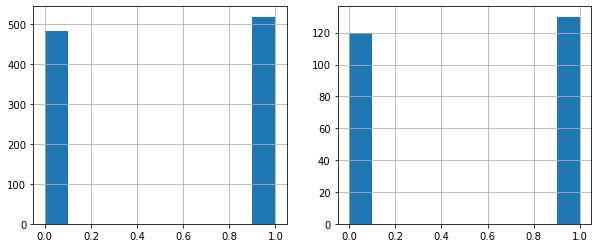

In [23]:
fig = plt.figure(figsize = (10,4))

plt.subplot(1,2, 1)
strat_train_set["Direction"].hist()

plt.subplot(1, 2, 2)
strat_test_set["Direction"].hist()

#fig.savefig("plots/11_sampling_train_test_sets.png")
plt.show()

### Standardize data

In [24]:
std_X_train,  std_X_test = standard_data(X_train.copy(), X_test.copy())

## Modeling

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression()

In [39]:
logreg.score(X_test, y_test)

0.52

## Evaluate model

In [41]:
predicted_target, actual_target = evaluate_model(data, logreg, output_name)

TypeError: standard_data() got an unexpected keyword argument 'output_name'

### Confusion matrix

Normalized confusion matrix


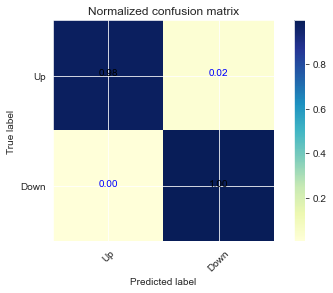

In [12]:
fig_conf_mat = plot_confusion_matrix(actual_target, predicted_target, classes = class_names)

### ROC curve

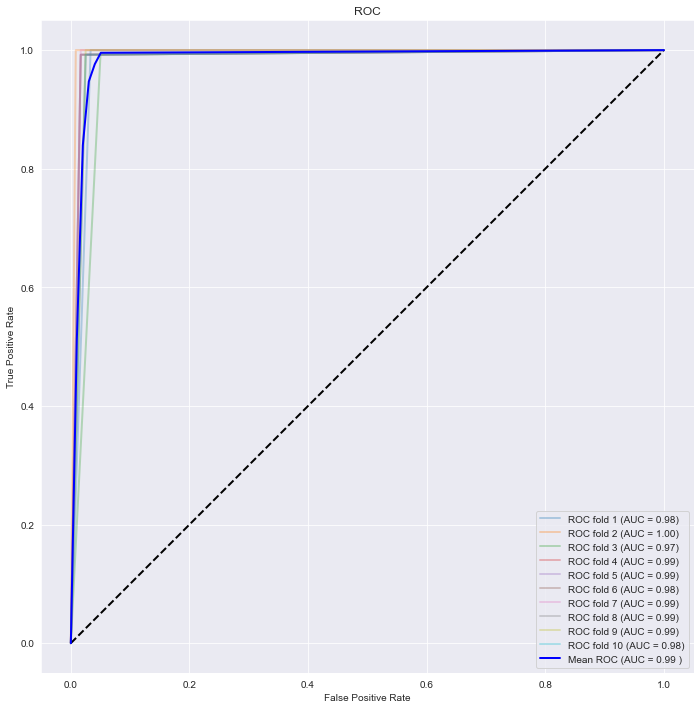

In [13]:
fig_roc_auc = plot_roc_auc(actual_target, predicted_target)